<a href="https://colab.research.google.com/github/marlianirura/Posttest2_Data-mining/blob/main/(096)_Marliani_Rura_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("dataset_market_basket.csv")

In [4]:
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#1 item set
df.sum()

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [6]:
df.columns

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [7]:
# 2 Item Set
from itertools import permutations

# Extract Unique Items
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [9]:
# Filter Item Kombinasi
rule_baru = []
for rule in rules:
# Memfilter dengan Nama Kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

In [10]:
hitung = {}
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
  ])
  hitung[str(rule)] = banyak_data
  
hitung

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [11]:
supp = [i/len(df)*100 for i in hitung.values()]
print(supp)
for item,support in hitung.items():
  print(f"{item} support = {round(support/len(df)*100)}%")

[5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.26315

In [12]:
for item,ab in hitung.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%")

whole milk->pasrty Confidence = 20.0%
whole milk->salty snack Confidence = 20.0%
whole milk->sausage Confidence = 40.0%
whole milk->semi-finished bread Confidence = 20.0%
whole milk->yogurt Confidence = 20.0%
whole milk->soda Confidence = 20.0%
whole milk->rolls/buns Confidence = 20.0%
whole milk->butter Confidence = 20.0%
pasrty->whole milk Confidence = 100.0%
pasrty->salty snack Confidence = 100.0%
salty snack->whole milk Confidence = 50.0%
salty snack->pasrty Confidence = 50.0%
salty snack->root vegetables Confidence = 50.0%
salty snack->detergent Confidence = 50.0%
sausage->whole milk Confidence = 50.0%
sausage->semi-finished bread Confidence = 25.0%
sausage->yogurt Confidence = 25.0%
sausage->hygiene articles Confidence = 25.0%
sausage->rolls/buns Confidence = 50.0%
semi-finished bread->whole milk Confidence = 100.0%
semi-finished bread->sausage Confidence = 100.0%
semi-finished bread->yogurt Confidence = 100.0%
yogurt->whole milk Confidence = 100.0%
yogurt->sausage Confidence = 1

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

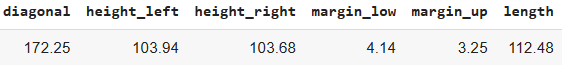
<!-- 1412 -->

In [14]:
df = pd.read_csv("deteksi_uang_palsu.csv")
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [15]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
import pandas as pd
import numpy as np

df = pd.read_csv('deteksi_uang_palsu.csv')

# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))
df['Jarak'] = distances

# Menyimpan hasil ke file CSV
df.to_csv('hasil_jarak.csv', index=False)

df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,200.285783
1,True,171.66,103.68,103.41,4.35,3.33,113.74,201.070850
2,True,172.23,104.00,103.35,4.43,2.95,113.12,200.485558
3,True,172.07,104.21,103.82,4.29,3.35,113.30,200.524023
4,True,171.79,104.57,104.04,4.26,3.15,113.46,200.774364
5,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
6,False,171.56,104.03,103.93,5.47,3.50,111.67,197.874877
7,False,171.90,104.33,104.40,4.70,3.31,112.12,199.106750
8,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021
9,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206


In [16]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))

# Mengambil K jarak terdekat
K = int(np.sqrt(len(df)))
indices = np.argsort(distances)[:K]

# Mengurutkan data berdasarkan K jarak terdekat
df_sorted = df.iloc[indices].reset_index(drop=True)

# Menyimpan hasil ke file CSV
df_sorted.to_csv('sorted.csv', index=False)

# hasil file csv dari penambahan kolom jarak
df_sorted = pd.read_csv('sorted.csv')
df_sorted

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
1,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206
2,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021


In [17]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# Hitung jumlah masing-masing label
label_counts = df["is_genuine"].value_counts()

# Tampilkan label terbanyak
print("Label terbanyak adalah", label_counts.idxmax())

Label terbanyak adalah True


# (3) Analisis

> Nama : Marliani Rura

> Nim : 2109116096


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Bussines Understanding

Tujuan dari dataset Student Behavior adalah untuk Memahami perilaku siswa di sekolah dalam berbagai aspek, sehingga pihak sekolah dapat Meningkatkan kualitas pendidikan dengan memanfaatkan data yang ada untuk memperbaiki sistem pendidikan dan pengajaran di sekolah.

# Data Understanding

##colect intial data

In [18]:
df = pd.read_csv("Student_Behaviour.csv")
df

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30 - 60 minute,Morning,7000,Yes,50%,More than 2 hour,30 - 60 minutes,Bad,Bad,No
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Good,good,No
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,2.30 - 3 hour,Bad,good,No
233,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,Yes,75%,More than 2 hour,2.30 - 3 hour,Awful,good,No


In [19]:
df.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [20]:
df.tail()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
230,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30 - 60 minute,Morning,7000,Yes,50%,More than 2 hour,30 - 60 minutes,Bad,Bad,No
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Good,good,No
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,2.30 - 3 hour,Bad,good,No
233,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0 - 30 minute,Anytime,20000,Yes,75%,More than 2 hour,2.30 - 3 hour,Awful,good,No
234,No,Female,B.com ISM,155.0,39.0,45.0,45.0,50.0,Sports,3 - 4 hour,Night,10,No,75%,30 - 60 Minute,2.30 - 3 hour,fabulous,good,No


## describe data

In [21]:
# dataset dengan label target bca
df_1 = df[df['Department'] == "BCA"]
df_1

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Yes,Female,BCA,156.0,50.0,64.0,49.5,85.0,Reading books,2 - 3 hour,Night,100000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Bad,Bad,No
155,Yes,Female,BCA,160.0,50.0,86.0,68.0,80.0,Video Games,2 - 3 hour,Anytime,25000,Yes,75%,30 - 60 Minute,0 - 30 minutes,Good,Bad,No
156,Yes,Male,BCA,175.0,68.9,71.0,66.0,80.0,Video Games,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,2 - 2.30 hour,Good,good,No
157,Yes,Female,BCA,155.0,50.0,80.0,73.0,80.0,Cinema,0 - 30 minute,Anytime,50000,Yes,75%,1 - 30 Minute,30 - 60 minutes,Good,Bad,Yes


In [22]:
# dataset dengan label target cinema
df_2 = df[df['hobbies'] == "Cinema"]
df_2

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
5,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,0 - 30 minutes,Bad,good,No
11,No,Female,BCA,152.0,51.0,60.0,55.0,65.0,Cinema,2 - 3 hour,Night,20000,Yes,75%,1 - 1.30 hour,2 - 2.30 hour,Bad,Bad,No
13,No,Male,BCA,160.0,52.0,50.0,55.0,50.0,Cinema,0 - 30 minute,Anytime,17,Yes,75%,30 - 60 Minute,1.30 - 2 hour,Good,Awful,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Yes,Female,Commerce,153.0,45.0,83.0,73.0,75.0,Cinema,0 - 30 minute,Morning,20000,Yes,75%,30 - 60 Minute,0 - 30 minutes,Good,good,No
223,Yes,Male,Commerce,170.0,65.0,82.0,73.0,80.0,Cinema,0 - 30 minute,Anytime,16000,Yes,50%,1.30 - 2 hour,0 - 30 minutes,fabulous,Bad,No
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,2 - 3 hour,Anytime,25000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Good,good,No
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30 - 60 minute,Night,20000,Yes,50%,30 - 60 Minute,2.30 - 3 hour,Bad,good,No


In [23]:
# dataset dengan label target height dibawah 100
df_3 = df[df['Height(CM)'] < 100]
df_3

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
10,No,Male,BCA,99.0,50.0,75.0,70.0,60.0,Video Games,1 - 2 Hour,Morning,18000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Good,Bad,No
25,No,Male,BCA,90.0,89.0,60.0,50.0,50.0,Sports,30 - 60 minute,Morning,18000,Yes,75%,30 - 60 Minute,30 - 60 minutes,Bad,good,Yes
29,No,Female,BCA,99.0,40.0,94.0,94.0,80.0,Reading books,30 - 60 minute,Night,15000,Yes,75%,1 - 1.30 hour,30 - 60 minutes,Good,Bad,No
41,No,Female,BCA,98.0,35.0,70.0,55.0,70.0,Reading books,1 - 2 Hour,Night,20000,Yes,75%,1.30 - 2 hour,30 - 60 minutes,Good,good,No
47,No,Male,B.com Accounting and Finance,90.0,83.0,60.0,82.0,65.0,Video Games,0 - 30 minute,Anytime,100000,Yes,75%,30 - 60 Minute,1.30 - 2 hour,Awful,good,No
70,Yes,Male,BCA,99.0,78.0,91.0,60.0,60.0,Sports,30 - 60 minute,Anytime,15000,Yes,25%,1.30 - 2 hour,0 - 30 minutes,Bad,Bad,Yes
96,Yes,Female,BCA,4.5,42.0,85.0,90.0,85.0,Cinema,30 - 60 minute,Anytime,20000,Yes,100%,1 - 1.30 hour,30 - 60 minutes,Good,Awful,No


In [24]:
df.select_dtypes(include=np.number)

,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,salary expectation
0,100.0,58.0,79.0,65.0,80.0,40000
1,90.0,40.0,70.0,80.0,70.0,15000
2,159.0,78.0,69.5,61.0,55.0,13000
3,147.0,20.0,70.0,59.0,58.0,1500000
4,170.0,54.0,40.0,65.0,30.0,50000
...,...,...,...,...,...,...
230,170.0,76.0,72.0,67.0,65.0,7000
231,172.0,52.0,72.0,70.0,76.0,25000
232,139.0,33.0,90.0,75.0,70.0,20000
233,153.0,58.0,85.0,74.0,75.0,20000


In [25]:
#menampilkan nilai min, max, standar deviasi dan mean dari weight
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())
  print("Nilai standar deviasi :", dfnum.std())
  print("Nilai mean            :", dfnum.mean())

tampil("Weight(KG)")

Nilai minimum         : 20.0
Nilai maksimum        : 106.0
Nilai standar deviasi : 14.895844449081954
Nilai mean            : 60.803829787234044


## Explore Data

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np

### visualisasi Comparison

<Axes: xlabel='Department', ylabel='count'>

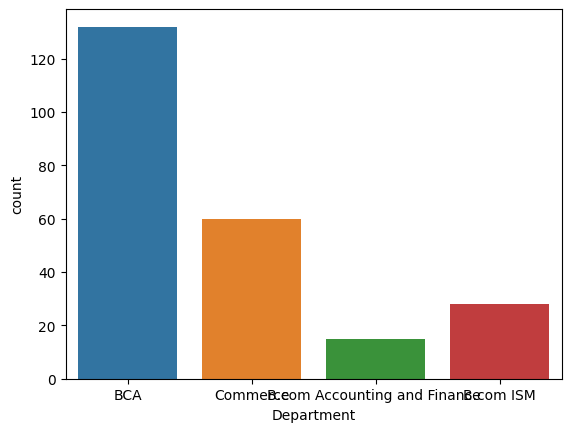

In [27]:
# visualisasi yang menampilkan banyaknya department
sns.countplot(data=df,x="Department")

<Axes: xlabel='Financial Status', ylabel='count'>

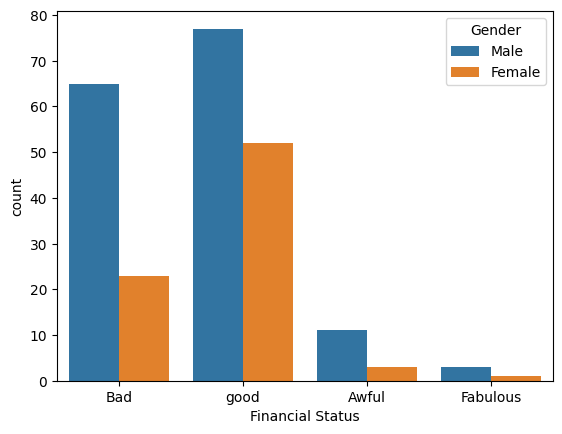

In [28]:
# visualisasi yang menampilkan berapa banyak Financial Status berdasarkan gendernya
sns.countplot(x="Financial Status", hue="Gender", data=df)

### visualisasi distribution

<Axes: xlabel='Weight(KG)', ylabel='Count'>

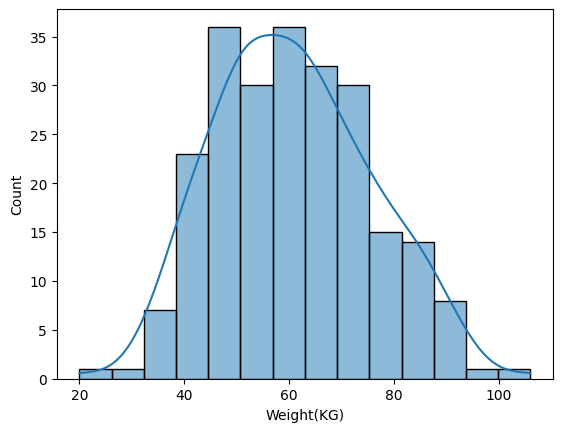

In [29]:
# historgram untuk Weight(KG)
sns.histplot(data=df, x="Weight(KG)", kde=True)

<Axes: xlabel='Weight(KG)'>

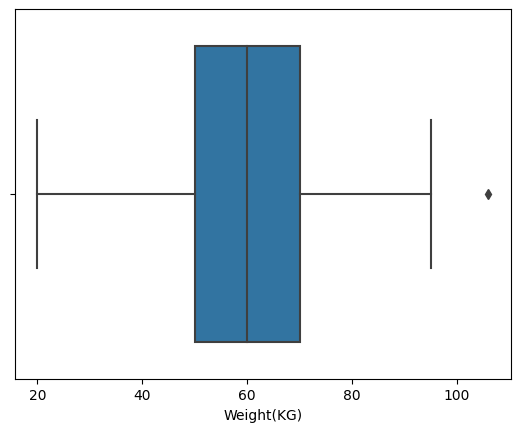

In [30]:
# boxplot untuk credit 	Weight(KG)
sns.boxplot(data=df, x="Weight(KG)")

### visualisasi relationship

<Axes: xlabel='Department', ylabel='hobbies'>

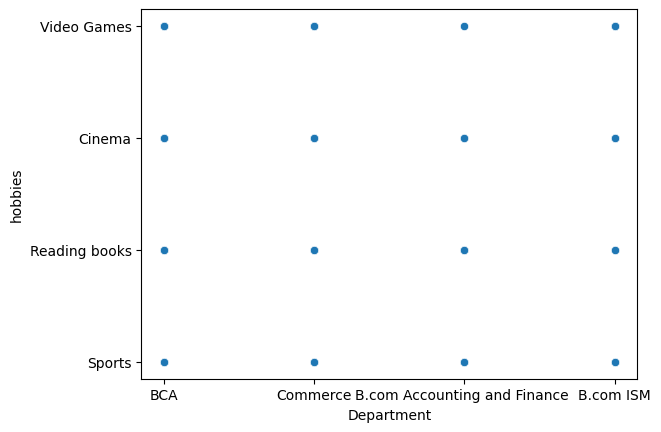

In [31]:
# visualisasi scatterplot untuk Department dan hobbies
sns.scatterplot(data=df,x='Department',y='hobbies')

###visualisasi Composition

In [32]:
import plotly.express as px

In [33]:
# visualisasi pieplot untuk daily studing time
px.pie(df,names="daily studing time")

#Data Preparation

###select data

In [34]:
# menampikan 2 Kolom
selected_data = df[["Department", "prefer to study in"]]

# Menampilkan Perintah
print(selected_data.head())

  Department prefer to study in
0        BCA            Morning
1        BCA            Morning
2        BCA            Anytime
3        BCA            Anytime
4        BCA            Morning


###Clean data

In [35]:
df.isna().sum()

Certification Course                                      0
Gender                                                    0
Department                                                0
Height(CM)                                                0
Weight(KG)                                                0
10th Mark                                                 0
12th Mark                                                 0
college mark                                              0
hobbies                                                   0
daily studing time                                        0
prefer to study in                                        0
salary expectation                                        0
Do you like your degree?                                  0
willingness to pursue a career based on their degree      0
social medai & video                                      0
Travelling Time                                           0
Stress Level                            

In [36]:
df.isna().sum() / len(df) * 100

Certification Course                                      0.0
Gender                                                    0.0
Department                                                0.0
Height(CM)                                                0.0
Weight(KG)                                                0.0
10th Mark                                                 0.0
12th Mark                                                 0.0
college mark                                              0.0
hobbies                                                   0.0
daily studing time                                        0.0
prefer to study in                                        0.0
salary expectation                                        0.0
Do you like your degree?                                  0.0
willingness to pursue a career based on their degree      0.0
social medai & video                                      0.0
Travelling Time                                           0.0
Stress L

###construct data

In [37]:
# Buat fitur baru yang menghitung 
df["prediksi"] = df["Department"] + df["prefer to study in"]

# Dmenampilkan
print(df.head())

  Certification Course  Gender Department  Height(CM)  Weight(KG)  10th Mark  \
0                   No    Male        BCA       100.0        58.0       79.0   
1                   No  Female        BCA        90.0        40.0       70.0   
2                  Yes    Male        BCA       159.0        78.0       69.5   
3                  Yes  Female        BCA       147.0        20.0       70.0   
4                   No    Male        BCA       170.0        54.0       40.0   

   12th Mark  college mark        hobbies daily studing time  \
0       65.0          80.0    Video Games      0 - 30 minute   
1       80.0          70.0         Cinema     30 - 60 minute   
2       61.0          55.0         Cinema         1 - 2 Hour   
3       59.0          58.0  Reading books         1 - 2 Hour   
4       65.0          30.0    Video Games     30 - 60 minute   

  prefer to study in  salary expectation Do you like your degree?  \
0            Morning               40000                       No

###integrate data

In [38]:
# Melakukan integrasi data dengan menambahkan kolom baru
df['time to study'] = df['prefer to study in'] + df['hobbies']

# Melakukan perubahan pada nilai data tertentu
df.loc[df['prefer to study in'] == 'nilai_awal', 'social medai & video'] = 'nilai_baru'

# Melakukan penghapusan kolom yang tidak diperlukan
df = df.drop(['10th Mark', '10th Mark'], axis=1)

# Menyimpan dataset yang telah diubah
df.to_csv('data_baru.csv', index=False)

print("berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu kelas online")

berhasil membuat dataset baru dan menambahkan 1 kolom baru yaitu kelas online


In [39]:
df.info

<bound method DataFrame.info of     Certification Course  Gender Department  Height(CM)  Weight(KG)  \
0                     No    Male        BCA       100.0        58.0   
1                     No  Female        BCA        90.0        40.0   
2                    Yes    Male        BCA       159.0        78.0   
3                    Yes  Female        BCA       147.0        20.0   
4                     No    Male        BCA       170.0        54.0   
..                   ...     ...        ...         ...         ...   
230                  Yes    Male  B.com ISM       170.0        76.0   
231                  Yes    Male  B.com ISM       172.0        52.0   
232                  Yes  Female        BCA       139.0        33.0   
233                  Yes  Female   Commerce       153.0        58.0   
234                   No  Female  B.com ISM       155.0        39.0   

     12th Mark  college mark        hobbies daily studing time  \
0         65.0          80.0    Video Games      

###format data

In [40]:
# Mengganti nilai null dengan nilai rata-rata
mean_value = df['12th Mark'].mean()
df['12th Mark'] = df['12th Mark'].fillna(mean_value)

# Mengubah tipe data review count dari string ke integer
df['12th Markt'] = df['12th Mark'].astype(int)

# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Mengurutkan data berdasarkan kolom5
df = df.sort_values('12th Mark')

# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)

In [41]:
df

,Certification Course,Gender,Department,Height(CM),Weight(KG),12th Mark,college mark,hobbies,daily studing time,prefer to study in,...,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job,prediksi,time to study,12th Markt
234,No,Female,B.com ISM,155.0,39.0,45.0,50.0,Sports,3 - 4 hour,Night,...,No,75%,30 - 60 Minute,2.30 - 3 hour,fabulous,good,No,B.com ISMNight,NightSports,45
196,No,Female,B.com ISM,155.0,39.0,45.0,50.0,Sports,3 - 4 hour,Night,...,No,75%,30 - 60 Minute,30 - 60 minutes,fabulous,good,No,B.com ISMNight,NightSports,45
185,Yes,Male,B.com ISM,163.0,80.0,47.0,30.0,Cinema,0 - 30 minute,Morning,...,Yes,50%,1 - 30 Minute,0 - 30 minutes,Awful,Awful,No,B.com ISMMorning,MorningCinema,47
184,No,Male,B.com ISM,150.0,48.0,48.0,60.0,Sports,1 - 2 Hour,Anytime,...,Yes,50%,1 - 30 Minute,1 - 1.30 hour,Bad,Bad,No,B.com ISMAnytime,AnytimeSports,48
15,Yes,Male,BCA,156.0,68.0,48.0,60.0,Video Games,30 - 60 minute,Anytime,...,Yes,75%,1 - 1.30 hour,more than 3 hour,Good,Bad,No,BCAAnytime,AnytimeVideo Games,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Yes,Male,BCA,175.0,73.0,90.0,80.0,Cinema,1 - 2 Hour,Anytime,...,Yes,50%,0 Minute,1 - 1.30 hour,Good,Bad,No,BCAAnytime,AnytimeCinema,90
37,No,Female,BCA,150.0,45.0,90.0,90.0,Cinema,0 - 30 minute,Night,...,Yes,100%,1 - 1.30 hour,0 - 30 minutes,Awful,good,No,BCANight,NightCinema,90
161,Yes,Male,Commerce,167.0,53.0,91.0,88.0,Video Games,30 - 60 minute,Morning,...,Yes,25%,30 - 60 Minute,2 - 2.30 hour,Bad,Bad,No,CommerceMorning,MorningVideo Games,91
202,Yes,Female,Commerce,160.0,68.0,92.0,80.0,Cinema,3 - 4 hour,Morning,...,Yes,75%,1.30 - 2 hour,0 - 30 minutes,Good,good,No,CommerceMorning,MorningCinema,92


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 234 to 29
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Certification Course                                    235 non-null    object 
 1   Gender                                                  235 non-null    object 
 2   Department                                              235 non-null    object 
 3   Height(CM)                                              235 non-null    float64
 4   Weight(KG)                                              235 non-null    float64
 5   12th Mark                                               235 non-null    float64
 6   college mark                                            235 non-null    float64
 7   hobbies                                                 235 non-null    object 
 8   daily studing time                     